## Marlon Diaz, Spring 2023
### Python Assignment 5 for Physics Course 381 Upper Division from California State University - East Bay
### The Robert Andrews Millikan experiment to verify Einstein’s photo-electric relationship.

My introduction will be quick so that we can get straight to the python code and compute linear regression. 

If you are interested in reading the original paper from Mr. Millikan, check out https://journals.aps.org/pr/pdf/10.1103/PhysRev.7.355

It started in 1900 with Planck introducing his constant on blackbody radiation, denoted $h$ and with value $h= 6.626 x 10^{-34}$ Js.

This brings us to the quantum world of energy with Planck and Einstein in 1905. Einstein worked on his theory of the photoelectric effect and stated that the max kinetic energy for emitted electrons off a piece of metal, such as zinc, gold, aluminum, ect is   :

$$ E_{max} = hf- E_{0}$$

where $E_{0}$ is the minimum energy with which an electron is bound in the metal.

$h$ is Planck constant, and $f$ stands for frequency. 

The max energy of the emitted electrons is just $ E_{max} = eV$
It was found experimentally that $E_{max}$ is independent of the intensity of the light falling on the metal.

$E_{max}$ can also be plotted as a function of frequency. For frequencies $f$ greater than some minimum $f_{0} = \frac{E_{0}}{h}$, the data for $E_{max}$ versus $f$ fits a straight line, whose slope equals Planck's constant! In other words

$E_{max} = hf - E_{0}$

In 1914, Robert A. Millikan's highly accurate measurements of the Planck constant from the photoelectric effect supported Einstein's model.

In the original paper, Millikan stated: "That there is a linear relation between `V` and `f`".

# Where did I get the data points from?
On Canvas, my professor provided the data. I downloaded a file called `millikan.txt`. 
This file contains two columns of numbers, giving the x and y coordinates of a set of data points.

- The x-coordinate variable represents the frequency f in Hertz. Millikan varied the frequency of light shining on the metal surface to observe its effects. For Linear regression `x` is the independent variable. 

- The y-coordinate variable represents the voltage V in Volts. For Linear regression `y` is the dependent variable


# IMPORT PYTHON PACKAGE

In [11]:
# packages

from pylab import imshow, show
from numpy import loadtxt

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

#### TASK: Write a program to read these data points and make a graph with one dot or circle for each point. 

### Millikan’s Data for the Photoelectric Effect

 If the light has a high enough frequency (the frequency of light is related to its color), then the absorption of the light results in electrons being emitted from the surface. Albert Einstein produced a theory to explain this behavior and Robert Millikan performed an experiment to confirm that theory.  

In the experiment, light of various frequencies was shone upon a metallic surface, and then the electric potential (voltage) required to stop those electrons was measured.  A rough estimation of the data is found in the following output. 


In [2]:
# Read Text Files with Pandas using read_csv()

# read text file into pandas DataFrame and create
# header with x = frequency and y = Voltage

data = pd.read_csv("millikan.txt", sep=" ", header=None,
                names=["Frequency_f_Hz", "Voltage_V_volts"])

# display Data as a DataFrame
print(data)


   Frequency_f_Hz  Voltage_V_volts
0    5.487400e+14          0.53090
1    6.931000e+14          1.08420
2    7.430700e+14          1.27340
3    8.219300e+14          1.65980
4    9.607400e+14          2.19856
5    1.184000e+15          3.10891


### SCATTER PLOT 

In [7]:
xdf2 = pd.DataFrame(data, columns=['Frequency_f_Hz', 'Voltage_V_volts' ])

In [8]:
xdf2

,Frequency_f_Hz,Voltage_V_volts
0,5.487400e+14,0.53090
1,6.931000e+14,1.08420
2,7.430700e+14,1.27340
3,8.219300e+14,1.65980
4,9.607400e+14,2.19856
5,1.184000e+15,3.10891


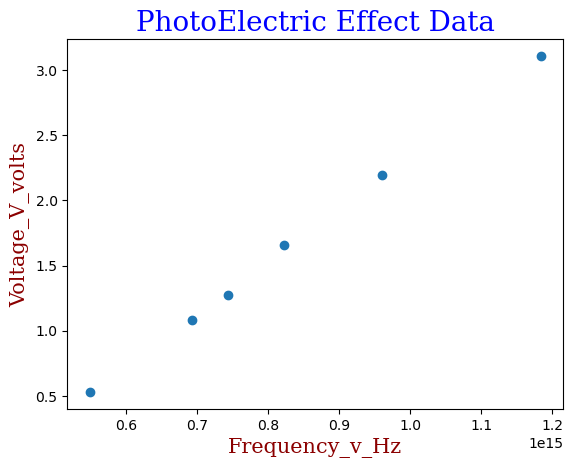

In [9]:
font1 = {'family':'serif','color':'blue','size':20}
font2 = {'family':'serif','color':'darkred','size':15}

plt.title("PhotoElectric Effect Data", fontdict = font1)
plt.xlabel("Frequency_v_Hz", fontdict = font2)
plt.ylabel("Voltage_V_volts", fontdict = font2)

plt.scatter(x=xdf2['Frequency_f_Hz'], y=xdf2['Voltage_V_volts'])
plt.show()

# Linear Regression in Python using numpy + polyfit 

#### numpy.polyfit is for the Least squares polynomial fit.

In [13]:
reg = np.polyfit(xdf2['Frequency_f_Hz'], xdf2['Voltage_V_volts'], deg = 1)
print(reg)

[ 4.08822736e-15 -1.73123580e+00]


# Printed coefficients
slope = m $ = 4.08822736 * 10^{-15} $ 

intercept = c $ = -1.7312358039813585 $


#### numpy.polyval is to Evaluate a polynomial at specific values.

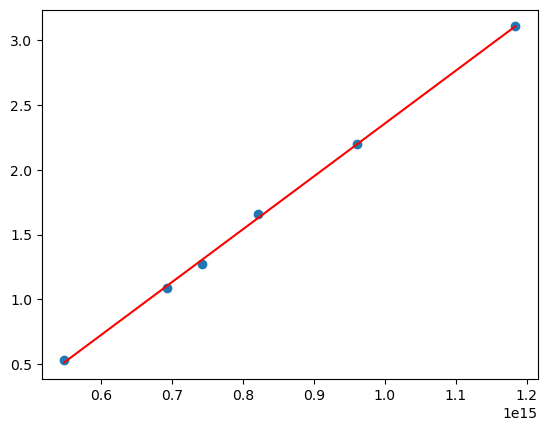

In [17]:
trend = np.polyval(reg, xdf2['Frequency_f_Hz'])
plt.scatter(xdf2['Frequency_f_Hz'], xdf2['Voltage_V_volts'])
plt.plot(xdf2['Frequency_f_Hz'], trend, 'r');

The data in the file millikan.txt represent frequencies `f` in hertz (first column) and voltages `V` in volts (second column) from photoelectric measurements of this kind. Using the equation above and the program you wrote, and given that the charge on the electron is 1.602 × 10−19 C, calculate from Millikan’s experimental data a value for Planck’s constant. Compare your value with the accepted value of the constant, which you can find in books or on-line. You should get a result within a couple of percent of the accepted value. 

In [42]:
e = 1.6 * 10**-19
m = 4.08822736*10**-15

planck = m * e

print('plancks constant is', planck)

plancks constant is 6.541163776000001e-34


# Linear regression using sklearn (better method)
is a fundamental statistical technique that models the relationship between a dependent variable and one or more independent variables. 

A linear regression fits a straight line to observed data, attempting to demonstrate a linear relationship between variables and make predictions on new data yet to be observed.

Using `sklearn.linear_model.LinearRegression`, you can easily perform linear regression in Python. Here is a sample code to demonstrate how to do this:


In [19]:
from sklearn.linear_model import LinearRegression

In [56]:
x = xdf2[['Frequency_f_Hz']]
y = xdf2['Voltage_V_volts']*e

In [57]:
fit = LinearRegression().fit(x,y)

In [58]:
# Predict values using the fitted model
y_pred = fit.predict(x)

In [59]:
# Evaluate the model
r2_score = fit.score(x, y)
print(f"R-squared value: {r2_score}")

R-squared value: 0.999339780732655


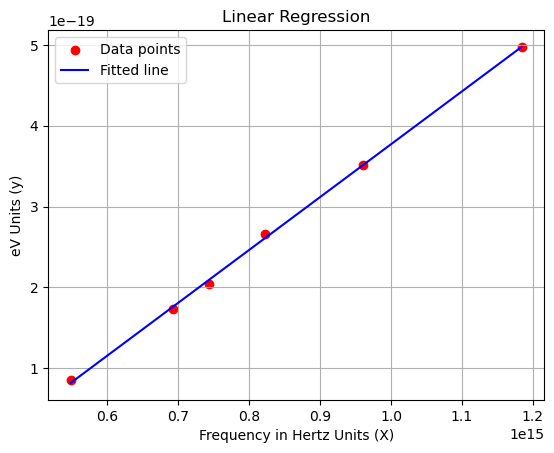

In [60]:
# Optionally, plot the data points and the fitted line
plt.scatter(x, y, color='red', label='Data points')
plt.plot(x, y_pred, color='blue', label='Fitted line')
plt.xlabel('Frequency in Hertz Units (X)')
plt.ylabel('eV Units (y)')
plt.grid(True)
plt.title('Linear Regression')
plt.legend()
plt.show()

# TASK 2 
#### This figure above represents the turn on voltages versus their respective frequencies.
#### Add code to your program, before the part that makes the graph, to calculate the quantities below.

$$ E_{x} = \frac{1}{N} \Sigma_{i=1}^{N} x_{i} $$

$$ E_{y} = \frac{1}{N} \Sigma_{i=1}^{N} y_{i} $$

$$ E_{xx} = \frac{1}{N} \Sigma_{i=1}^{N} x_{i}^{2} $$

$$ E_{xy} = \frac{1}{N} \Sigma_{i=1}^{N} x_{i}y_{i} $$


#### and from them calculate and print out the slope m and intercept c of the best-fit line.

using the following notation: \
$c1 = E_{x}$ \
$c2 = E_{y}$ \
$c3 = E_{xy}$ \
$c4 = E_{xx}$ 

$$ m = \frac{c3-c1*c2}{c4-c1^{2}} $$

and 

$$ c = \frac{c4*c2-c1*c3}{c4-c1^{2}}$$

or in general:

$$ c = c2 - m*c1$$


In [258]:
# -------------- using numpy to calculate the sum
# -------------- straight line fit to y vs x 

n = 6

# Sum values of list x and divie by n, = average of x-coordinate 

x = np.array([5.487400*10**14, 6.931000*10**14, 7.430700*10**14, 8.219300*10**14, 9.607400*10**14, 1.184000*10**15])

c1 = np.sum(x)/n

# Sum values of list y and divie by n, = average of y-coordinate

y = np.array([0.53090, 1.08420, 1.27340, 1.65980,  2.19856, 3.10891])

c2 = np.sum(y)/n


# multiply list x by y element by element = list a2
a2 = np.multiply(x,y)

# sum element of a2
c3 = np.sum(a2)

# multiply list x by x element by element = list a1
a1 = np.multiply(x,x)

# sum element of a1
c4 = np.sum(a1)

print('Sum of Ex = c1 = ', c1)
print('Sum of Ey = c2 =', c2)
print('Sum of Exy = c3 =', c3)
print('Sum of Exx = c4 =', c4)

Sum of Ex = c1 =  825263333333333.4
Sum of Ey = c2 = 1.6426283333333334
Sum of Exy = c3 = 9146443812400000.0
Sum of Exx = c4 = 4.334102495e+30


#### Within the code, include a loop that goes through each of the data points in turn and evaluates the quantity $ y = mx_{i}+c$
 using the values of m and c from above. 
 
 #### Create loop for $ y = mx + c$ 

where m is its slope/gradient and c its intercept.

slope m is 4.088227358517514e-15
intercept c is -1.7312358039813585


Text(0, 0.5, 'Y')

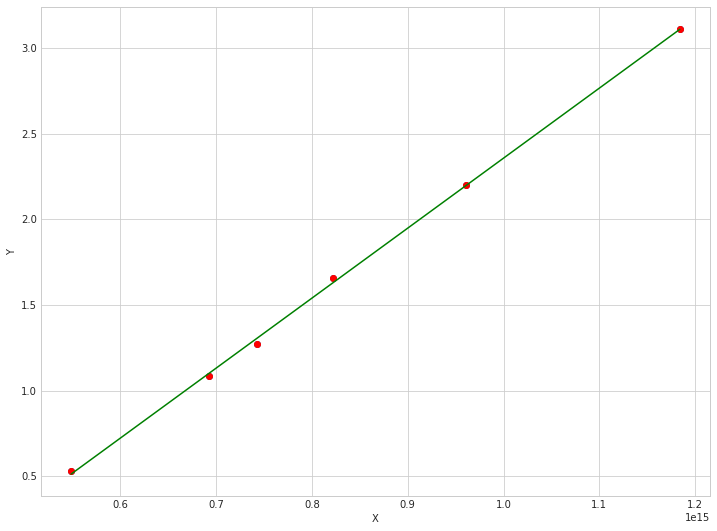

In [279]:
x_values = np.array([5.487400*10**14, 6.931000*10**14, 7.430700*10**14, 8.219300*10**14, 9.607400*10**14, 1.184000*10**15])
y_values = np.array([0.53090, 1.08420, 1.27340, 1.65980,  2.19856, 3.10891])
n = np.size(x_values)
  
x_mean = np.mean(x_values)
y_mean = np.mean(y_values)

x_mean,y_mean
  
Sxy = np.sum(x_values*y_values)- n*x_mean*y_mean
Sxx = np.sum(x_values*x_values)-n*x_mean*x_mean
  
m = Sxy/Sxx
c = y_mean-m*x_mean

print('slope m is', m)
print('intercept c is', c)
  
plt.scatter(x_values,y_values)
plt.xlabel('Independent variable X')
plt.ylabel('Dependent variable Y')

y_pred = m * x_values + c

plt.scatter(x_values, y_values, color = 'red')
plt.plot(x_values, y_pred, color = 'green')
plt.xlabel('X')
plt.ylabel('Y')

